# Homework 2: Exploratory data analysis and visualization

UIC CS 418, Spring 2022

_According to the **Academic Integrity Policy** of this course, all work submitted for grading must be done individually, unless otherwise specified. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml._

This homework is an **individual assignment for all graduate students**. **Undergraduate students are allowed to work in pairs and submit one homework assignment per pair**. There will be no extra credit given to undergraduate students who choose to work alone. The pairs of students who choose to work together and submit one homework assignment together still need to abide by the Academic Integrity Policy and not share or receive help from others (except each other).

There are three parts in this homework. The first one is a practice introduction to `matplotlib` (5%). The second is a guided exploration of a bikeshare dataset (45%). The third one is a self-guided exploration of a dataset on social media and internet attitudes (50%). You can also earn extra credit of 20%.


## Due Date

This assignment is due at 11:59pm Friday, February 18th. 


### What to Submit

You need to complete all code and answer all questions denoted by **Q#** (each one is under a bike image) in this notebook. When you are done, you should export **hw2.ipynb** with your answers as a PDF file, upload the PDF file to *Homework 2 - Written Part* on Gradescope, tagging each question. You need to upload a completed Jupyter notebook (hw2.ipynb file) to *Homework 2 - code* on Gradescope. If one of these two parts (written and code) is missing, you will lose 50%. For undergraduate students who work in a team of two, only one student needs to submit the homework and just tag the other student on Gradescope.

#### Autograding

We will not use autograding for this homework assignment.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Practice: `matplotlib` (5%)

[`matplotlib`][mpl] is the most widely used plotting library available for Python. It comes with a good amount of out-of-the-box functionality and is highly customizable. Most other plotting libraries in Python provide simpler ways to generate complicated `matplotlib` plots, including `seaborn`, so it's worth learning a bit about `matplotlib` now.

Notice how all of our notebooks have lines that look like:

	%matplotlib inline
	import matplotlib.pyplot as plt
	
The `%matplotlib inline` magic command tells `matplotlib` to render the plots
directly onto the notebook (by default it will open a new window with the plot).

Then, the `import` line lets us call `matplotlib` functions using `plt.<func>`

Here's a graph of `cos(x)` from 0 to 2 * pi.

[mpl]: http://matplotlib.org/

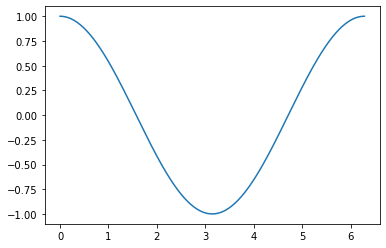

In [2]:
# Set up (x, y) pairs from 0 to 2*pi
xs = np.linspace(0, 2 * np.pi, 300)
ys = np.cos(xs)

# plt.plot takes in x-values and y-values and plots them as a line
plt.plot(xs, ys)

`matplotlib` also conveniently has the ability to plot multiple things on the same plot. Just call `plt.plot` multiple times in the same cell:

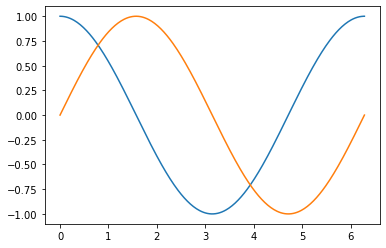

In [3]:
plt.plot(xs, ys)
plt.plot(xs, np.sin(xs))

That plot looks pretty nice but isn't presentation-ready. Luckily, `matplotlib` has a wide array of plot customizations.

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q0 (5%):

Skim through the first part of the tutorial at https://github.com/rougier/matplotlib-tutorial to create the plot below. There is a lot of extra information there which we suggest
you read on your own time. For now, just look for what you need to make the plot.

Specifically, you'll have to change the x and y limits, add a title, and add a legend.

![](q1.png)

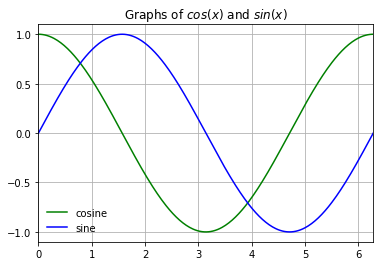

In [4]:
# Here's the starting code from last time. Edit / Add code to create the plot above.
plt.plot(xs, ys, color="green", label="cosine")
plt.plot(xs, np.sin(xs), color="blue", label="sine")
xmin, xmax = xs.min(), xs.max() # find min and max on x axis
plt.xlim(xmin, xmax) # set the min max limit on x axis
# Add legend
plt.legend(loc="lower left", frameon=False)
plt.title("Graphs of $cos(x)$ and $sin(x)$")
plt.grid()

# Add ticks
plt.yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
plt.show()


# Part 1: Guided EDA of bikeshare trips (40%)

You will be performing some basic EDA (exploratory data analysis) on
bikeshare data in Washington D.C. 

The variables in this data frame are defined as:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not
- weekday : day of the week (Sunday to Saturday)
- workingday : if day is neither weekend nor holiday
- weathersit :
    - 1: Clear or partly cloudy
    - 2: Mist + clouds
    - 3: Light Snow or Rain
    - 4: Heavy Rain or Snow
- temp : Normalized temperature in Celsius (divided by 41)
- atemp: Normalized feeling temperature in Celsius (divided by 50)
- hum: Normalized percent humidity (divided by 100)
- windspeed: Normalized wind speed (divided by 67)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including casual and registered

In [5]:
bike_trips = pd.read_csv('bikeshare.csv')

# Here we'll do some pandas datetime parsing so that the dteday column
# contains datetime objects.
bike_trips['dteday'] += ':' + bike_trips['hr'].astype(str)
bike_trips['dteday'] = pd.to_datetime(bike_trips['dteday'], format="%Y-%m-%d:%H")
bike_trips = bike_trips.drop(['yr', 'mnth', 'hr'], axis=1)

bike_trips.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01 01:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01 02:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01 03:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01 04:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.1 (8%):
Explore the `bike_trips` dataframe to answer the following questions.

What is the data granularity?
What time range is represented here? Write code in the cell below to perform your exploration.

In [6]:
#[your code here]
# total number of rows
print("total number of rows: ", len(bike_trips))
print("total items on dteday column: ", bike_trips['dteday'].count())
# count number of unique dates
print("number of unique dates: ", len(bike_trips['dteday'].apply(lambda x: x.date()).unique()))
# count the unique time entries for each day
print("---------------------------------------------------")
print("\nunique time entries for each day:")
print(bike_trips['dteday'].apply(lambda x: x.date()).value_counts())
print("---------------------------------------------------")
print("\nThere are dates that have less than 24 time entries," +
          "\nso check if there are duplicates in 'dteday' column:")
print(bike_trips['dteday'].value_counts())
print("=> There are no duplicates")
print("---------------------------------------------------")

total number of rows:  17379
total items on dteday column:  17379
number of unique dates:  731
---------------------------------------------------

unique time entries for each day:
2011-01-01    24
2012-04-03    24
2012-04-28    24
2012-04-29    24
2012-04-30    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: dteday, Length: 731, dtype: int64
---------------------------------------------------

There are dates that have less than 24 time entries,
so check if there are duplicates in 'dteday' column:
2011-01-01 00:00:00    1
2012-05-03 04:00:00    1
2012-05-02 14:00:00    1
2012-05-02 15:00:00    1
2012-05-02 16:00:00    1
                      ..
2011-09-04 01:00:00    1
2011-09-04 02:00:00    1
2011-09-04 03:00:00    1
2011-09-04 04:00:00    1
2012-12-31 23:00:00    1
Name: dteday, Length: 17379, dtype: int64
=> There are no duplicates
---------------------------------------------------


(_Your Q1.1 answer here. Double click to edit_)
1. Data granularity: each row records the information for bike trips for every hour during a day in the years of 2011 and 2012
    The total unique number of days is 731 (365 days for 2011 and 366 days for 2012 which is leap year). The total number of values in 'dteday' column match the total number of rows, and there are no duplicates, so 'dteday' can be used as primary key.
2. time range: the time range is 1 hour.
    The number of record for a day are mostly 24, and they differs by 1 hour. Because there are no duplicates for the date and time, the days with recorded time less than 24 have missing values.

## Using `pandas` to plot

`pandas` provides useful methods on dataframes. For simple plots, we prefer to
just use those methods instead of the `matplotlib` methods since we're often
working with dataframes anyway. The syntax is:

    dataframe.plot.<plotfunc>

Where the `<plotfunc>` is one of the functions listed under _Plotting_ here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

<AxesSubplot:xlabel='dteday'>

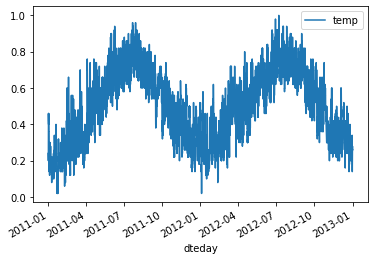

In [7]:
# This plot shows the temperature at each data point

bike_trips.plot.line(x='dteday', y='temp')

## `seaborn`

Now, we'll learn how to use the [`seaborn`][sns] Python library. `seaborn`
is built on top of `matplotlib` and provides many helpful functions
for statistical plotting that `matplotlib` and `pandas` don't have.

Generally speaking, we'll use `seaborn` for more complex statistical plots,
`pandas` for simple plots (eg. line / scatter plots), and
`matplotlib` for plot customization.

Nearly all `seaborn` functions are designed to operate on `pandas`
dataframes. Most of these functions assume that the dataframe is in
a specific format called *long-form*, where each column of the dataframe
is a particular feature and each row of the dataframe a single datapoint.

For example, this dataframe is long-form:

```
   country year avgtemp
 1  Sweden 1994       6
 2 Denmark 1994       6
 3  Norway 1994       3
 4  Sweden 1995       5
 5 Denmark 1995       8
 6  Norway 1995      11
 7  Sweden 1996       7
 8 Denmark 1996       8
 9  Norway 1996       7
```

But this dataframe of the same data is not:

```
   country avgtemp.1994 avgtemp.1995 avgtemp.1996
 1  Sweden            6            5            7
 2 Denmark            6            8            8
 3  Norway            3           11            7
```

Note that the `bike_trips` dataframe is long-form.

For more about long-form data, see https://stanford.edu/~ejdemyr/r-tutorials/wide-and-long.
For now, just remember that we typically prefer long-form data and it makes plotting using
`seaborn` easy as well.

[sns]: http://seaborn.pydata.org/index.html

We can create the same plot as the `dataframe.plot` above using the following `seaborn` function: `sns.lineplot`. Notice that instead of calling the plot function on dataframe object, here we pass it as a parameter to the function:

<AxesSubplot:xlabel='dteday', ylabel='temp'>

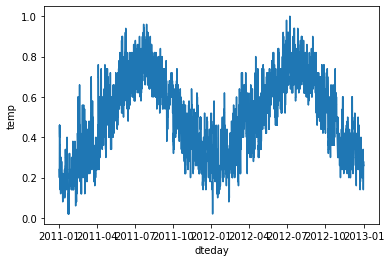

In [8]:
# You can create a plot similar to the one above using the following seaborn syntax
# Note that the seaborn plot is a bit different and requires some customizations (more on this later)
sns.lineplot(x="dteday", y="temp", data=bike_trips)

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.2 (8%):

Use seaborn's `barplot` function to make a bar chart showing the average
number of registered riders on each day of the week over the 
entire `bike_trips` dataset.

Here's a link to the seaborn API: http://seaborn.pydata.org/api.html

See if you can figure it out by reading the docs. 

What trends do you notice? What do you suppose causes these trends?

Notice that `barplot` draws error bars for each category. It uses bootstrapping to make those.

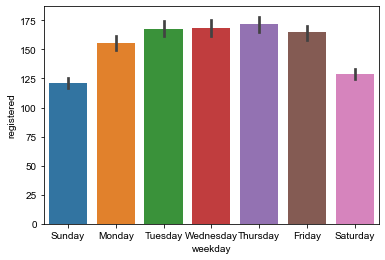

In [9]:
#[your code here]
g = sns.barplot(x='weekday', y='registered', data=bike_trips, hue='weekday',dodge=False)
# plt.legend(title='weekday',bbox_to_anchor=(1, 1), loc=2, 
#            borderaxespad=0.)
g.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday'])
plt.legend([],[], frameon=False)
sns.set(rc = {'figure.figsize':(10.5,5.5)})
plt.show()

(Your Q1.2 answer here)
The number of registered riders reduces during weekend. It might be because the registered riders who are workers do not ride on the days that they do not work.

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.3 (8%):

Now for a fancier plot that `seaborn` makes really easy to produce.

Use the `displot` function to plot a histogram of all the total rider counts in the `bike_trips` dataset. Can you fit a curve to the histogram of the data using `seaborn`? You just need to tune `kde` and `stat` paramaters to the `displot` function. Fancy!

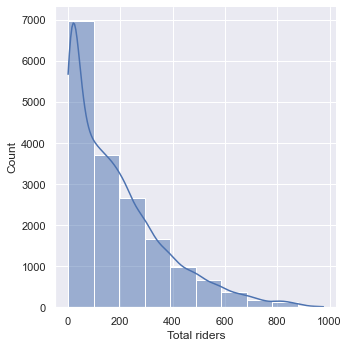

In [10]:
#[your code here]
sns.displot(data=bike_trips,x='cnt', kde=True, stat='count', bins=10)
plt.xlabel("Total riders")
plt.show()

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.4 (8%):

Use `seaborn` to make side-by-side boxplots of the number of casual riders (just
checked out a bike for that day) and registered riders (have a bikeshare membership). The `boxplot` function will plot all the columns of the dataframe you pass in.

Once you make the plot, you'll notice that there are many outliers that make the plot hard to see. To mitigate this, change the y-scale to be logarithmic.

That's a plot customization so you'll use `matplotlib`. The `boxplot` function returns a `matplotlib` Axes object which represents a single plot and has a `set_yscale` function.

The result (after customization) should look like:

![](q5.png)

Revisiting Q1.1 on data granularity, what is more suitable text for `ylabel` than `Number of riders`?

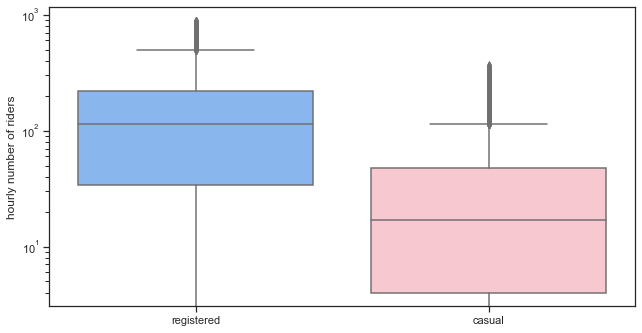

In [11]:
#[your code here]
# g = sns.boxplot(data=bike_trips)
# plt.xlim([9.5, 11.5])
# g.set_yscale('log')
# plt.ylim([0,1000])
# plt.show()
sns.set_style('white')
sns.set_theme(style='ticks')

df = pd.DataFrame(data=bike_trips, columns=["registered", "casual"])
g = sns.boxplot(x="variable", y="value", 
                data=pd.melt(df), 
                palette={'registered':'#77B5FE','casual':'pink'})
g.set_yscale('log')
plt.xlabel("")
plt.ylabel("hourly number of riders")
plt.grid(False)
plt.show()

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.5 (8%):

Let's take a closer look at the number of registered vs. casual riders.

Use the `lmplot` function to make a scatterplot. Put the number of casual
riders on the x-axis and the number of registered riders on the y-axis.
Each point should correspond to a single row in your `bike_trips` dataframe. Notice that `seaborn` automatically fits a line of best
fit to the plot. Does that line seem to be relevant?

You should note that `lmplot` allows you to pass in `fit_line=False` to
avoid plotting lines of best fit when you feel they are unnecessary 
or misleading.

There seem to be two main groups in the scatterplot. Let's
see if we can separate them out. Use `lmplot` to make the scatterplot again. This time, use the `hue` parameter
to color points for weekday trips differently from weekend trips. You should
get something that looks like:

![](q1-5.png)


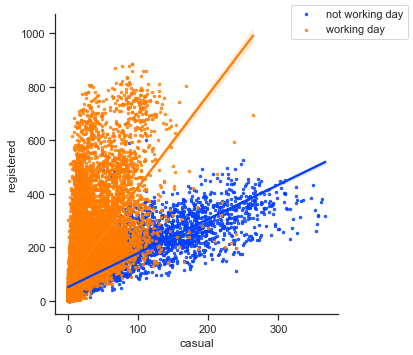

In [12]:
# In your plot, you'll notice that your points are larger than ours. That's
# fine. If you'd like them to be smaller, you can add scatter_kws={'s': 6}
# to your lmplot call. That tells the underlying matplotlib scatter function
# to change the size of the points.

#[your code here]
ax = sns.lmplot(x='casual', y='registered', hue='workingday',
                data=bike_trips, 
                 palette='bright',
                scatter_kws={'s': 6},
               legend=True)
legendObj = ax.legend
legendObj._set_loc(1)
legendObj.set_title("")
legendObj.set_frame_on(True)
legendObj.get_texts()[0].set_text('not working day')
legendObj.get_texts()[1].set_text('working day')
plt.show()
# Note that the legend for workingday isn't super helpful. 0 in this case
# means "not a working day" and 1 means "working day". Try fixing the legend
# to be more descriptive.
# HINT: ax = sns.lmplot(..., legend=True)
# legendObj = ax.legend # Modify this object

## Want to learn more?

We recommend checking out the `seaborn` tutorials on your own time. http://seaborn.pydata.org/tutorial.html

The `matplotlib` tutorial we linked in Question 1 is also a great refresher on common `matplotlib` functions: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

Here's a great blog post about the differences between Python's visualization libraries:
https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/


# Part 2: Self-directed EDA of social media and internet attitudes (55%)

The last part is intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them.  The goal here is for you to thoroughly explore a dataset on attitudes towards the internet and whether it's good for society. 

_Question 2.0_ is asking you to look at a given visualization and reverse engineer the code that created it. _Question 2.1_ is about _data exploration visualization_ while the other questions are about _data presentation visualization_. Report your three most significant findings (_Q2.2, Q2.3, and Q2.4_). Each finding should have a _visualization headline_  which highlights the main takeaway in 5-15 words, an informative visualization that supports your finding and a _visualization description_, 100-150 words per finding explaining your assumptions and what you have found. For example, the visualization headline could be "_Majority of Facebook, Instagram and Snapchat users visit these social networks daily_" with the following bar plot visualization:  

<img src="q2-1.png">


The survey data that you will analyze was collected by Pew Research. In order to access it, you need to create an account and download it from [here](https://www.pewresearch.org/internet/dataset/core-trends-survey/) (click on "Download Dataset" in upper right corner). The file you will work with is `January 8-February 7, 2019 - Core Trends Survey - CSV.csv`. The file that contains information about the meaning of each feature is `January 8-February 7, 2019 - Core Trends Survey - Questionnaire.docx`.


Be sure to consider transformations, subsets, correlations, reference markers, and lines/curves-of-best-fit (as covered in Chapter 6 of PTDS) to reveal the relationship that you are wanting to learn more about.  Also be sure to make plots that are appropriate for the variable types.  For completeness, be explicit about any assumptions you make in your analysis.  An exemplary plot will have:

* A title
* Labelled and appropriately scaled axes
* A legend, if applicable
* A carefully selected color scheme
* A main point, accentuated through design choices


<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.0 (5%): Reverse Engineer

Your first step is to load the data from `January 8-February 7, 2019 - Core Trends Survey - CSV.csv`, and understand what is stored in it. Read the  the survey questionnaire in `January 8-February 7, 2019 - Core Trends Survey - Questionnaire.docx` to understand the meaning of each feature. Your assignment is to replicate the bar plot visualization shown above. Notice the labels on x and y axes as well as the legend of the plot to determine the information needed to construct the plot.

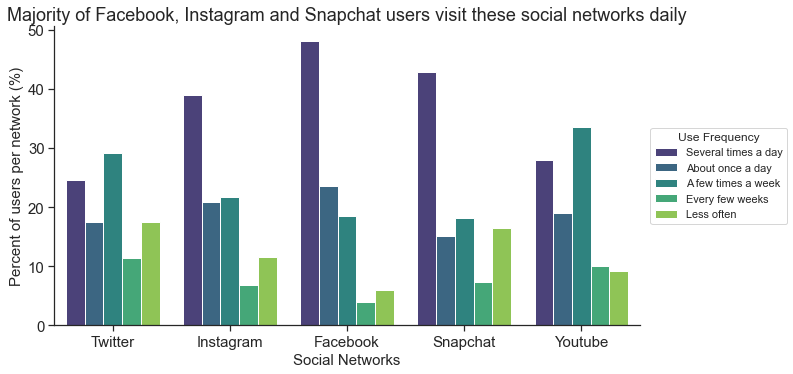

In [13]:
#[your code here]
#HINTS
# 1) Read your dataframe with pandas
# 2) Identify what colums are used for plot above
# 3) Filter required rows and columns necessary for plotting above figure
# 4) Your dataframe is in wide_format. You need to convert to long_format. See pandas.melt documentation
# i.e. originally there is a column each for these five social medias. The column name should be value for a new column.
# 5) Once dataframe is in wide format, filter individuals who responded to the survey
# 6) Use pandas aggregation after groupby to calculate percentage of responses for each social media
# 7) Use seaborn barplot to plot the figure above. Customize with color palette='viridis'
# 8) Add descriptive xlabel, ylabel, and title
# 9) Customize legend if necessary
df = pd.read_csv('January 8-February 7, 2019 - Core Trends Survey - CSV.csv')
new_df = pd.DataFrame(data=df, columns=['sns2a','sns2b','sns2c','sns2d','sns2e'])
new_df = new_df.apply(pd.value_counts)
new_df = new_df.rename(columns={'sns2a':'Twitter',
                                'sns2b':'Instagram',
                                'sns2c':'Facebook',
                                'sns2d':'Snapchat',
                                'sns2e':'Youtube'})
new_df = new_df.transpose().iloc[:, 1:6]
new_df = new_df.rename(columns={'1':'Several times a day',
                                '2':'About once a day',
                                '3':'A few times a week',
                                '4':'Every few weeks',
                                '5':'Less often'})
new_df = new_df.div(new_df.sum(axis=1),axis=0)
new_df = new_df*100
new_df['Social Network'] = new_df.index
new_df = pd.melt(new_df, value_vars=['Several times a day', 'About once a day', 
                   'A few times a week', 'Every few weeks', 'Less often'], id_vars=['Social Network'])
ax = sns.barplot(x='Social Network', y='value', hue='variable', data=new_df, palette='viridis')
ax.legend(title='Use Frequency',
          loc='right',
         bbox_to_anchor=(1.26, 0.5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('Percent of users per network (%)',fontsize=15)
plt.xlabel('Social Networks',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Majority of Facebook, Instagram and Snapchat' + 
          ' users visit these social networks daily',
          fontsize=18)
plt.show()

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.1 (5%): Initial exploration

Run descriptive statistics on the data by considering the EDA key data properties we covered in class. Write a 100-150 word description of your findings. Based on these statistics or other ideas you have, form hypotheses that guide your EDA and visualizations for the last three questions. You need to show at least one visualization but you are welcome to show more.

In [14]:
# Run descriptive statistics on the data and develop ideas on what to explore
#[your code here]
# number of books read in the past 12 months
new_df = pd.DataFrame(df[['age', 'party']].describe())
new_df

,age,party
count,1502.000000,1502.000000
mean,52.731691,2.625832
std,20.013867,1.783729
min,18.000000,1.000000
25%,36.250000,2.000000
50%,54.000000,2.000000
75%,66.750000,3.000000
max,99.000000,9.000000


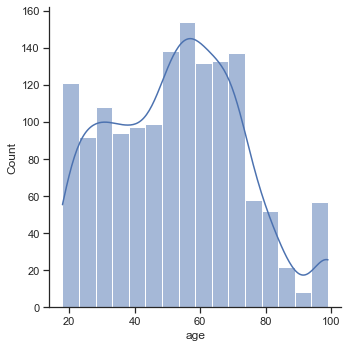

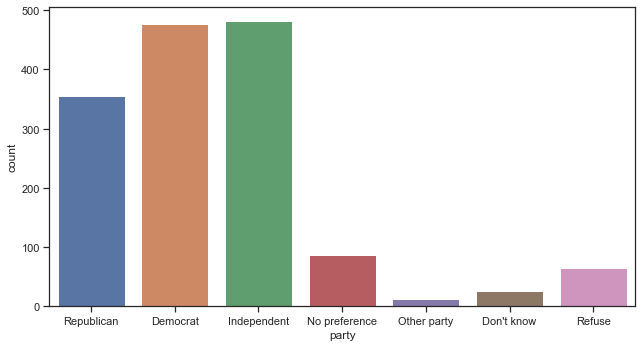

In [15]:
# Create one or more visualizations
sns.displot(x='age', data=df, kde=True)
plt.show()
sns.countplot(x='party', data=df)
plt.xticks([0,1,2,3,4,5,6],
           ['Republican', 'Democrat', 'Independent','No preference',
            'Other party', 'Don\'t know','Refuse'])
plt.show()

The age range is mostly from 20-70, so the result of the collected data may slightly skew to this age range. The mean of the age is about 52 and the median is about 54 which is good because the data contains the most ages in this age range. The exploration may be to see how the age range affects the distribution of users of different social networks.
The number of people for the Democratic party is higher than the number of people for the Republican party, but there are a lot of people in the Independent category, therefore, the exploration may be to see if people in this group lean more toward which party. From the result of this exploration, we can see the trend of popularity of the parties.

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.2 (15%): Most of the users of Snapchat is in age range lower than 40 years old

The exploration was on the age range of the users of the most popular social networks(Facebook, Instagram, Twitter, Snapchat, Youtube). The assumption was that Facebook, Youtube, Instagram will have users in all age range, and the users of Snapchat will be mostly on the left side of age range and the age range of Twitter users are mostly on the right of the age range. This assumption was the personal guesses based on the information about the purposes of these social networks(). The result shows that Snapchat has younger user group, and the age range is mostly from 20-40.

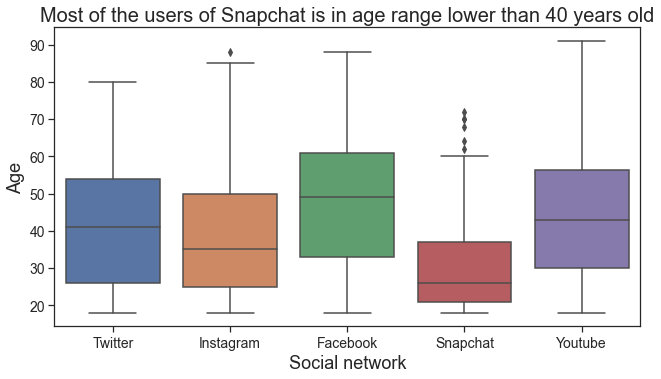

In [16]:
# your Q2.2 visualization code should be included here 
# make sure to execute it, so we can see your plot in the submitted pdf
#[your code here]
new_df = pd.DataFrame(data=df, columns=['age','sns2a','sns2b','sns2c','sns2d','sns2e'])
new_df = new_df.rename(columns={'sns2a':'Twitter','sns2b':'Instagram',
                                'sns2c':'Facebook','sns2d':'Snapchat','sns2e':'Youtube'})
new_df=pd.melt(new_df, id_vars=['age'])
new_df = new_df[new_df['value'] != ' ']
new_df = new_df[~new_df['age'].isin([98,99])]
new_df = new_df[new_df['value'].isin(['1','2','3'])]
# A title
# Labelled and appropriately scaled axes
# A legend, if applicable
# A carefully selected color scheme
# A main point, accentuated through design choices
sns.boxplot(x='variable', y='age', data=new_df)
plt.title("Most of the users of Snapchat is in age range lower than 40 years old",
          fontsize=20)
plt.ylabel("Age",fontsize=18)
plt.xlabel("Social network",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.3 (15%): The number of people who support or tend to support Democratic Party is dominent

The exploration was to see the trend on which of the two major parties(Democrat and Republican) have more suporters. The data was selected based on the number of people who consider themself as Democrat or Republican, and the number of people who lean more to either of the two parties. The result shows that the number of people who lean to Democratic party is dominent.

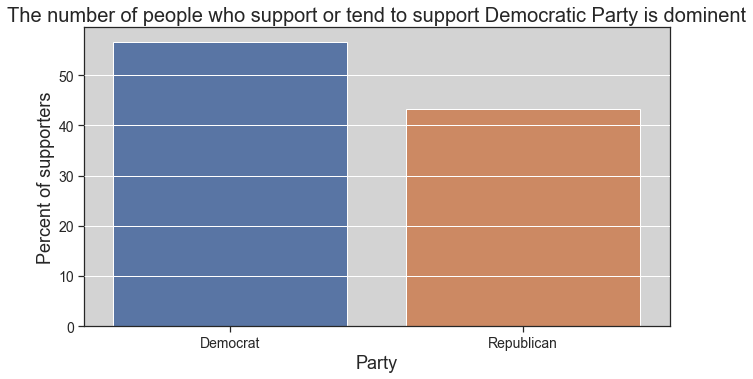

In [17]:
# your Q2.3 visualization code should be included here 
# make sure to execute it, so we can see your plot in the submitted pdf
#[your code here]
new_df = pd.DataFrame(data=df, columns=['party','partyln'])
new_df1 = new_df[~new_df['party'].isin([1,2])]
new_df1 = new_df1[new_df1['partyln'].isin(['1','2'])]
new_df1 = new_df1['partyln'].value_counts()
new_df1 = pd.DataFrame(new_df1)
new_df2 =  new_df[new_df['party'].isin([1,2])]['party'].value_counts()
new_df1['party'] = new_df2.array
new_df = new_df1.sum(axis=1)
new_df = new_df.div(new_df.sum(axis=0), axis=0)*100
new_df.name = 'percent'
new_df = new_df.to_frame()
new_df['party'] = new_df.index
# A title
# Labelled and appropriately scaled axes
# A legend, if applicable
# A carefully selected color scheme
# A main point, accentuated through design choices
ax = sns.barplot(data=new_df, y='percent', x='party')
plt.xticks([0,1],['Democrat', 'Republican'])
plt.title("The number of people who support or tend to support Democratic Party is dominent",
          fontsize=20)
plt.ylabel("Percent of supporters",fontsize=18)
plt.xlabel("Party",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, color='w', axis='y')
ax.set_facecolor('#D3D3D3')
ax.set_axisbelow(False)
plt.show()

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.4 (15%): More than half number of users of Facebook, Instagram, Snapchat, Twitter and Facebook prefer using these network through smart phones

The exploration was on the devices that users of the most popular social networks uses mostly to access them. Nowaday, more and more people have their own smart phones, so the assumption is that the users of those social networks will mostly use them through their phones. The visualization shows that more than half number of users of those network prefer using them on their smart phones.

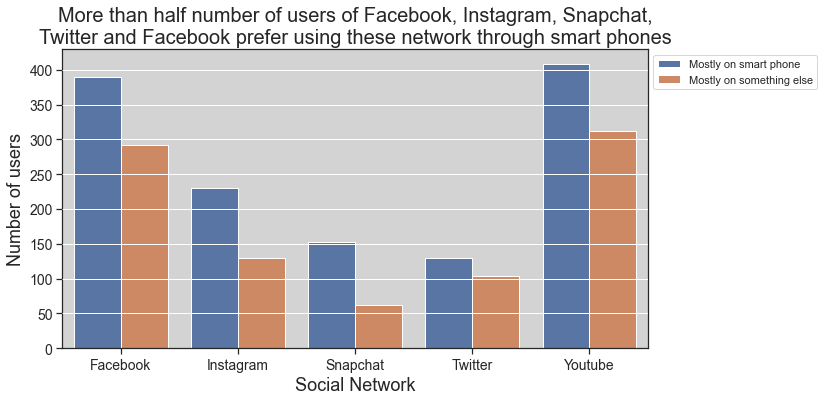

In [18]:
# your Q2.4 visualization code should be included here 
# make sure to execute it, so we can see your plot in the submitted pdf
#[your code here]
new_df = df[df['q20'].isin(['1','2'])]
new_df = pd.DataFrame(data=new_df, columns=['q20', 'web1a','web1b','web1c','web1d','web1e'])
new_df = new_df.rename(columns={'web1a':'Twitter','web1b':'Instagram',
                                'web1c':'Facebook','web1d':'Snapchat','web1e':'Youtube'})
new_df = pd.melt(new_df, id_vars=['q20'])
new_df = new_df[new_df['value'] == 1]
new_df = new_df.groupby(['variable','q20']).count()

new_df = new_df.reset_index()
ax = sns.barplot(x='variable', y='value', hue='q20', data=new_df)
# A title
# Labelled and appropriately scaled axes
# A legend, if applicable
# A carefully selected color scheme
# A main point, accentuated through design choices
plt.title("More than half number of users of Facebook,"+
          " Instagram, Snapchat,\n" + 
          "Twitter and Facebook prefer using these network through smart phones",
          fontsize=20)
plt.xlabel("Social Network",fontsize=18)
plt.ylabel("Number of users",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
legendObj = plt.legend(bbox_to_anchor=(1,1))
legendObj.get_texts()[0].set_text('Mostly on smart phone')
legendObj.get_texts()[1].set_text('Mostly on something else')
plt.grid(True, color='w', axis='y')
ax.set_facecolor('#D3D3D3')
ax.set_axisbelow(False)
plt.show()

# Extra Credit (20%)

The best 10 visualizations and insights from Questions 2.2 to 2.4 will get an extra 20% credit (at most one visualization can be considered per submission). There is nothing you need to do for the extra credit except to do your best in the last three questions. We will showcase the best visualizations in class! 

This was the last part of Homework 2. Now you need to submit your work following the instructions in the beginning of the notebook and you are done!